In [1]:
import numpy as np
import pandas as pd
import os
import sqlalchemy as sqla
import sqlite3 as sql
from sqlite3 import Error
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [2]:
file_loc = os.getcwd()

In [3]:
file_loc

'C:\\Users\\KH7020823\\sta208\\STA-208-project'

In [4]:
db1= sql.connect(file_loc+"\data1.db")
df1=pd.read_sql("SELECT * FROM loan",db1)
db2= sql.connect(file_loc+"\data2.db")
df2=pd.read_sql("SELECT * FROM loan",db2)
db3= sql.connect(file_loc+"\data3.db")
df3=pd.read_sql("SELECT * FROM loan",db3)
db4= sql.connect(file_loc+"\data4.db")
df4=pd.read_sql("SELECT * FROM loan",db4)
db5= sql.connect(file_loc+"\data5.db")
df5=pd.read_sql("SELECT * FROM loan",db5)
db6= sql.connect(file_loc+"\data6.db")
df6=pd.read_sql("SELECT * FROM loan",db6)
db7= sql.connect(file_loc+"\data7.db")
df7=pd.read_sql("SELECT * FROM loan",db7)
db8= sql.connect(file_loc+"\data8.db")
df8=pd.read_sql("SELECT * FROM loan",db8)
db9= sql.connect(file_loc+"\data9.db")
df9=pd.read_sql("SELECT * FROM loan",db9)
db10= sql.connect(file_loc+"\data10.db")
df10=pd.read_sql("SELECT * FROM loan",db10)
db11= sql.connect(file_loc+"\data11.db")
df11=pd.read_sql("SELECT * FROM loan",db11)
db12= sql.connect(file_loc+"\data12.db")
df12=pd.read_sql("SELECT * FROM loan",db12)

In [5]:
df = pd.DataFrame()
df = df.append(df1)
df = df.append(df2)
df = df.append(df3)
df = df.append(df4)
df = df.append(df5)
df = df.append(df6)
df = df.append(df7)
df = df.append(df8)
df = df.append(df9)
df = df.append(df10)
df = df.append(df11)
df = df.append(df12)
df.shape

(434407, 65)

In [6]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,17600,17600,17600,36 months,10.75%,574.12,B,B4,RENT,57109,...,6,0,1,95.1,1,0,88629,83563,2300,80329
1,12500,12500,12500,60 months,8.39%,255.8,B,B1,RENT,120000,...,9,0,1,100,0,0,80899,40673,48400,32499
2,10000,10000,10000,36 months,11.99%,332.1,C,C1,MORTGAGE,75000,...,9,0,2,100,0,1,71858,48844,0,60358
3,3000,3000,3000,36 months,7.39%,93.17,A,A4,RENT,80000,...,6,0,0,95,0,0,221908,25665,42200,30936
4,2000,2000,2000,36 months,6.49%,61.29,A,A2,RENT,90000,...,19,0,2,97.3,0,0,176338,68841,122100,48438


In [7]:
data = df.copy()

col_drop = ['grade','sub_grade','issue_d','earliest_cr_line','grade','zip_code',
            'last_credit_pull_d', 'total_pymnt_inv','funded_amnt','funded_amnt_inv']
data = data.drop(col_drop, axis = 1)
data = data.reset_index(drop=True)

In [8]:
y_temp = data['loan_status']

In [9]:
# recode loan_status
y = y_temp.copy()
for i in range(len(y)):
    if (y_temp[i] == 'Fully Paid') or (y_temp[i] == 'Current'):
        y[i] = 'good'
    else:
        y[i] = 'bad'

In [10]:
y.head()

0    good
1    good
2    good
3    good
4    good
Name: loan_status, dtype: object

In [11]:
purpose_temp = data['purpose']

In [12]:
purpose = purpose_temp.copy()
for i in range(len(purpose)):
    if (purpose_temp[i] == 'credit_card') or ( purpose_temp[i] == 'debt_consolidation') or (purpose_temp[i] == 'small_business') or (purpose_temp[i] == 'vacation') or (purpose_temp[i] == 'other'):
        purpose[i] = 'finantial'
    elif purpose_temp[i] == 'medical':
        purpose[i] == 'medical'
    else:
        purpose[i] = 'property'

In [13]:
purpose.head()

0    finantial
1    finantial
2    finantial
3    finantial
4    finantial
Name: purpose, dtype: object

In [14]:
addr_state_temp = data['addr_state']

In [15]:
#recode addr_state
addr_state = addr_state_temp.copy()
for i in range(len(y)):
    if addr_state_temp[i] == 'CA':
        addr_state[i] = 'CA'
    else:
        addr_state[i] = 'other'

In [16]:
addr_state.head()

0    other
1    other
2    other
3    other
4    other
Name: addr_state, dtype: object

In [17]:
verification_status_temp = data['verification_status']

In [18]:
#recode addr_state
verification_status = verification_status_temp.copy()
for i in range(len(y)):
    if verification_status_temp[i] == 'Not Verified':
        verification_status[i] = 'not verified'
    else:
        verification_status[i] = 'verified'

In [19]:
verification_status.head()

0        verified
1    not verified
2    not verified
3    not verified
4    not verified
Name: verification_status, dtype: object

In [20]:
#Create dummy variables
dummy1 = pd.get_dummies(y)
dummy2 = pd.get_dummies(purpose)
dummy3 = pd.get_dummies(addr_state)
dummy4 = pd.get_dummies(data['term'])
dummy5 = pd.get_dummies(data['home_ownership'])
dummy6 = pd.get_dummies(verification_status)
dummy7 = pd.get_dummies(data['initial_list_status'])
dummy8 = pd.get_dummies(data['application_type'])

In [21]:
data_category = ['loan_status','verification_status','addr_state', 'term', 'initial_list_status',
                 'application_type','finantial','medical','property','MORTGAGE','OWN','RENT']

In [22]:
#Insert dummy variables into dataset
data['loan_status'] = dummy1['good']
data['addr_state'] = dummy3['CA']
data['term'] = dummy4[' 36 months']
data['verification_status'] = dummy6['verified']
data['initial_list_status'] = dummy7['w']
data['application_type'] = dummy8['Individual']

data = data.drop(['purpose','home_ownership'], axis = 1)
data = pd.concat([data, dummy2.iloc[:,[0,2]],dummy5.iloc[:,1:4]],axis = 1)

# convert all data as float
data['int_rate'] = [x[:-1] for x in data['int_rate']]
data = data.astype(float)
data['int_rate'] = data['int_rate']/100

data.head()

,loan_amnt,term,int_rate,installment,annual_inc,verification_status,loan_status,addr_state,delinq_2yrs,open_acc,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,finantial,property,MORTGAGE,OWN,RENT
0,17600.0,1.0,0.1075,574.12,57109.0,1.0,1.0,0.0,0.0,6.0,...,0.0,88629.0,83563.0,2300.0,80329.0,1.0,0.0,0.0,0.0,1.0
1,12500.0,0.0,0.0839,255.80,120000.0,0.0,1.0,0.0,0.0,9.0,...,0.0,80899.0,40673.0,48400.0,32499.0,1.0,0.0,0.0,0.0,1.0
2,10000.0,1.0,0.1199,332.10,75000.0,0.0,1.0,0.0,0.0,9.0,...,1.0,71858.0,48844.0,0.0,60358.0,1.0,0.0,1.0,0.0,0.0
3,3000.0,1.0,0.0739,93.17,80000.0,0.0,1.0,0.0,1.0,6.0,...,0.0,221908.0,25665.0,42200.0,30936.0,1.0,0.0,0.0,0.0,1.0
4,2000.0,1.0,0.0649,61.29,90000.0,0.0,1.0,0.0,0.0,19.0,...,0.0,176338.0,68841.0,122100.0,48438.0,1.0,0.0,0.0,0.0,1.0


In [23]:
data_lasso = data.copy()

In [24]:
from  sklearn.preprocessing  import scale
data_lasso[data.columns[~data_lasso.columns.isin(data_category)]]=scale(data_lasso[data.columns[~data_lasso.columns.isin(data_category)]])

In [25]:
X = data_lasso[data_lasso.columns.difference(['loan_status'])].values
y = data_lasso.loc[:, 'loan_status'].values

In [26]:
X=X.astype(float)

In [27]:
selected_X_0 = ['loan_amnt', 'term', 'int_rate', 'annual_inc', 'out_prncp',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_amnt', 'num_bc_tl', 'num_op_rev_tl', 'num_rev_tl_bal_gt_0',
       'num_tl_op_past_12m', 'total_bc_limit', 'finantial', 'property',
       'MORTGAGE']

In [28]:
data_fnl = pd.concat([data_lasso[selected_X_0], data_lasso['loan_status']],axis = 1)

In [29]:
### training and test set split
#Split the data into training set(75% of data) and testing set(25% of data)
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_fnl, test_size = 0.25, random_state = 0)

## get the train and test data set
X_tr = train[train.columns.difference(['loan_status'])].values
y_tr = train.loc[:, 'loan_status'].values

X_te = test[test.columns.difference(['loan_status'])].values
y_te = test.loc[:, 'loan_status'].values

### PCA

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py


So far we have 60 predictor variables in total, whose data dimension is too large to distinguish important variables that have significant influence on the loan status. Therefore, in order for a clearer interpretation of the differences between borrowers that lead to different loan status, dimension reduction of these predictor variables is necessary.

Here we use Principal Component Analysis(PCA) to complete the data dimension reduction.

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [31]:
#Apply the principal components analysis
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [32]:
#Print the fitted components
print(pca.components_)

[[  4.14048417e-02  -2.15669009e-04  -4.11911107e-02 ...,   1.27715765e-01
    2.17488626e-01  -4.71543507e-03]
 [  5.75601853e-02  -6.00276479e-03  -5.15485594e-02 ...,   2.16505075e-01
    7.79098405e-02   4.02120635e-03]
 [  6.25598321e-02  -5.17241231e-03  -5.74144424e-02 ...,  -8.05765614e-02
   -2.91645009e-02  -6.69641624e-03]
 ..., 
 [ -5.77222915e-01  -5.77533199e-01  -5.77293990e-01 ...,   6.20064357e-05
    4.02672209e-05   2.28426914e-05]
 [ -3.23942641e-04  -3.16939870e-04  -3.49854837e-04 ...,  -3.22332808e-06
    1.28874573e-05  -1.43906754e-05]
 [ -4.28283266e-10  -1.51630586e-09  -7.58478756e-10 ...,   6.55767964e-01
   -8.66389574e-10  -2.65053656e-10]]


In [33]:
#Print the eigenvalues
print(pca.explained_variance_)

[  9.81425465e+00   5.14486281e+00   3.30698953e+00   2.88406544e+00
   2.72067614e+00   2.33920266e+00   2.09417245e+00   1.79925173e+00
   1.39244653e+00   1.19027759e+00   1.17970599e+00   1.08311326e+00
   1.03459071e+00   9.82443191e-01   9.73181556e-01   9.54030893e-01
   8.82758995e-01   8.48925977e-01   8.14360197e-01   7.99847501e-01
   7.04016262e-01   6.82344687e-01   6.02123089e-01   5.59621391e-01
   4.81886312e-01   4.58583620e-01   4.38778825e-01   3.62846694e-01
   3.28587981e-01   2.70069681e-01   2.37503358e-01   2.15902730e-01
   2.08772357e-01   2.05072513e-01   2.02565047e-01   1.82190754e-01
   1.58676731e-01   1.57601532e-01   1.33218469e-01   1.13171307e-01
   1.05920426e-01   1.04801723e-01   7.87509634e-02   7.10304636e-02
   5.75125352e-02   4.89800602e-02   3.77408420e-02   2.02332584e-02
   1.93973005e-02   1.72378608e-02   1.22575567e-02   6.42977122e-03
   6.02764503e-03   1.64928411e-03   1.00701547e-03   8.43423291e-05
   2.49288978e-06   1.66901360e-14

The first three principal components are plotted below:

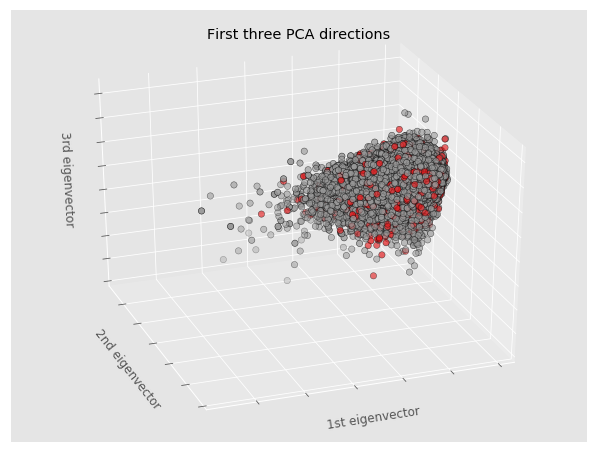

In [34]:
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X,y)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In choosing the number of principal components, we follow two the conventional methods:

1. select components that explain variances larger than 1

2. draw scree plot, and decide the number of components according to the elbow in the plot

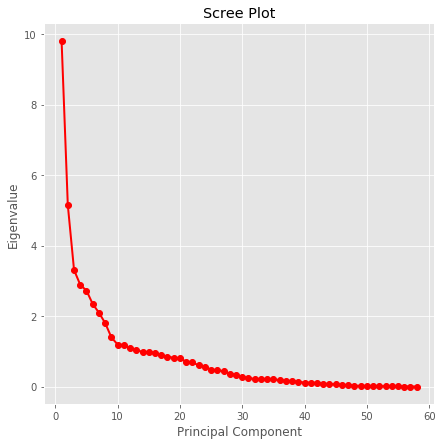

In [35]:
#Draw a scree plot
#Reference: https://stats.stackexchange.com/questions/12819/how-to-draw-a-scree-plot-in-python
fig = plt.figure(figsize=(7,7))
var = pca.explained_variance_
num = [i+1 for i in range(len(var))]

plt.plot(num, var, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

plt.show()

The first method indicates that the number of principal components should be 13, and in the scree plot, the elbow appears at about 10, so the two methods give similar answers. To guarantee that we obtain the most important characteristics, the number of principal components is decided as 10.

In [88]:
#Match the labels of components
pc = pca.components_[:10]
pc = pd.DataFrame(pc)
pc.columns = data.drop(['loan_status'],axis = 1).columns.values

In [37]:
pc.head()

,loan_amnt,term,int_rate,installment,annual_inc,verification_status,addr_state,delinq_2yrs,open_acc,revol_bal,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,finantial,property,MORTGAGE,OWN,RENT
0,0.041405,-0.000216,-0.041191,0.006085,0.139767,-0.000628,0.109477,-0.000484,0.056344,0.002515,...,0.230757,0.166777,0.206532,0.120208,0.146409,0.116226,0.009509,0.127716,0.217489,-0.004715
1,0.057560,-0.006003,-0.051549,0.005631,-0.181659,0.002839,0.151896,-0.004053,0.277925,-0.002093,...,-0.075771,0.136842,0.056887,0.110735,0.243994,0.192404,0.030687,0.216505,0.077910,0.004021
2,0.062560,-0.005172,-0.057414,0.031058,0.135675,-0.007197,0.075076,0.003115,0.220560,0.044833,...,0.201854,0.233689,-0.091853,0.275731,-0.133756,-0.242710,-0.010548,-0.080577,-0.029165,-0.006696
3,0.028640,0.006223,-0.034885,-0.012473,-0.188013,0.008195,0.027767,0.005423,0.113009,-0.043948,...,-0.092316,-0.078944,0.221780,-0.166749,-0.010877,-0.336811,-0.079182,0.093917,0.223500,-0.049850
4,0.021907,0.000536,-0.022515,0.024157,-0.154124,-0.005982,0.029606,0.000639,0.090195,0.020816,...,-0.007374,0.068352,0.068107,0.023015,-0.360267,0.027767,0.000028,-0.402715,0.098704,-0.026714


To investigate which predictor variables contribute most two the first 10 principal components, we list the ones that contribute over 20% below:

In [38]:
for i in range(len(pc)):
    pc1 = pc.iloc[i]
    print('component {}:\n {}\n'.format(i+1,pc1[abs(pc1)>=0.2]))

component 1:
 tot_cur_bal              0.218835
total_rev_hi_lim         0.227607
acc_open_past_24mths     0.237204
avg_cur_bal              0.226537
delinq_amnt              0.249585
mo_sin_old_rev_tl_op     0.234769
mo_sin_rcnt_rev_tl_op    0.225965
mo_sin_rcnt_tl           0.255695
num_actv_bc_tl           0.256528
tax_liens                0.230757
total_bal_ex_mort        0.206532
OWN                      0.217489
Name: 0, dtype: float64

component 2:
 open_acc                      0.277925
total_rec_prncp               0.249934
recoveries                    0.268756
delinq_amnt                  -0.212577
pct_tl_nvr_dlq                0.230541
pub_rec_bankruptcies          0.222340
total_il_high_credit_limit    0.243994
MORTGAGE                      0.216505
Name: 1, dtype: float64

component 3:
 open_acc                    0.220560
recoveries                 -0.208084
chargeoff_within_12_mths    0.287826
num_actv_rev_tl            -0.229474
num_bc_sats                -0.229467
pct

Each of the principal components have multiple predictor variables, and only a few of them have one or two dominant variables, while most of them consist of equally important variables.

To further make it clearer that which predictor variables act a major role in estabishing the principal components, we apply the varimax rotation, which push each contribution of predictor variables to either 1/-1 or 0 without damaging the structure of the principal components.

#### Varimax Rotation:

https://en.wikipedia.org/wiki/Talk:Varimax_rotation

In [39]:
from scipy import eye, asarray, dot, sum
from scipy.linalg import svd

In [40]:
def varimax(Phi, gamma = 1.0, q = 20, tol = 1e-6):
    #reference: https://en.wikipedia.org/wiki/Talk:Varimax_rotation
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in range(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, np.diag(np.diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    return dot(Phi, R)

In [41]:
pc_r = varimax(pca.components_)

In [42]:
pc_r = pd.DataFrame(pc_r)
pc_r.columns = data.drop(['loan_status'],axis = 1).columns.values

In [43]:
for i in range(10):
    pc1_r = pc_r.iloc[i]
    print('component {}:\n {}\n'.format(i+1,pc1_r[abs(pc1_r)>=0.2]))

component 1:
 num_rev_tl_bal_gt_0    1.0
Name: 0, dtype: float64

component 2:
 pub_rec_bankruptcies    1.0
Name: 1, dtype: float64

component 3:
 num_actv_rev_tl   -1.0
Name: 2, dtype: float64

component 4:
 total_rec_int   -1.0
Name: 3, dtype: float64

component 5:
 MORTGAGE   -1.0
Name: 4, dtype: float64

component 6:
 mort_acc    1.0
Name: 5, dtype: float64

component 7:
 num_rev_accts    1.0
Name: 6, dtype: float64

component 8:
 total_bc_limit   -1.0
Name: 7, dtype: float64

component 9:
 mo_sin_old_rev_tl_op    1.0
Name: 8, dtype: float64

component 10:
 out_prncp    1.0
Name: 9, dtype: float64



**num_rev_tl_bal_gt_0, pub_rec_bankruptcies, num_actv_rev_tl, total_rec_int, MORTGAGE, mort_acc , num_rev_accts, total_bc_limit, mo_sin_old_rev_tl_op**, and **out_prncp** are the predictor variables that absolutely dominate the first 10 principal components.

account status|home ownership|loan payment
------------ | ------------- | ------------
num_rev_tl_bal_gt_0|MORTGAGE|total_rec_int|
pub_rec_bankruptcies||out_prncp|
mort_acc||
num_rev_accts||
total_bc_limit||
num_actv_rev_tl||
mo_sin_old_rev_tl_op||

By classifying them into 3 categories, we can see that the account status(mostly revolving account status) is the primary factor decides how well the borrower will pay the loan, including number of accounts, activeness of account, the credit limit, etc. And current loan paying situation as well as if the borrower mortgages his/her home also play important roles.

The result is reasonable because the account status is actually a good reflection of the borrower's financial status and credit history, which play a decisive role on the the borrower's payment ability and habit. Also, mortgage home is a sign that the borrower is under economic difficulties, and the current payment status of the loan is of course another obvious indicator that if the loan will be fully paid.

Therefore, we can conclude from the PCA section that, account status(in which revolving account is the most important), if the borrower lives in a mortgage home and how the loan is currently paid is the most decisive 3 elements that affect whether the club can successfully get back the loan in full amount.

### KNN Classification
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

K-nearest-neighbor Classifier is also applied to predict the loan status. The tuning parameter **k** (number of neighbors) is determined by computing the misclassification rate of on the testing set by fitting the classifier on the training set.

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics as skmetrics
import itertools

In [44]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Code from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [45]:
#Function that calculate the test error
def test_error(X_tr,y_tr,X_te,y_te,regmod):
    """
    Return the test error for square error loss
    
    Input: training and testing design matrix, X_tr ,X_te
            training and testing response vector, y_tr, y_te
            a regression model, regmod
            
    Output: scalar empirical risk
    """
    regmod.fit(X_tr,y_tr)
    y_hat = regmod.predict(X_te)
    return np.mean((y_hat - y_te)**2)

In [65]:
#Generate possible lambda's: integer points from 3 to 12
alphas = [i+1 for i in range(2,12)]

#Ridge regression
TestEr = []

neigh = KNeighborsClassifier()

for a in alphas:
    neigh.set_params(n_neighbors=a)
    TestEr.append(test_error(X_tr,y_tr,X_te,y_te,neigh))

In [57]:
alphas = [i+1 for i in range(2,12)]

te3 =0.05119611056886614
te4=0.053295519419531867
te5=0.04925323658864478
te6=0.04921640485442257
te7=0.04949264286108911
te8=0.048986206515533787
te9=0.05070809009042191
te10=0.049621553930866834
te11=0.050827793226644075
te12=0.05011878234286661

TestEr =[te3,te4,te5,te6,te7,te8,te9,te10,te11,te12]

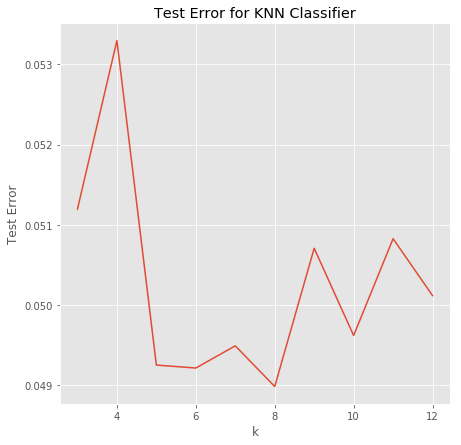

In [63]:
#Draw the Test Error for KNN classifier

fig = plt.figure(figsize = (7,7))
plt.plot(alphas,TestEr)

plt.xlabel('k')
plt.ylabel('Test Error')
plt.title('Test Error for KNN Classifier')
plt.show()

According to the plot, when $k=8$, the test error(same as misclassification rate) is the lowest, which is about 0.049. Therefore, the final KNN classifier is determined with number of neighbors = 8, and estimation and prediction are  practiced as follows.

In [59]:
#Fit the KNN Classifier
neigh = KNeighborsClassifier(n_neighbors = 8)
neigh.fit(X_tr, y_tr) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [60]:
#Prediction on the test set
pred_knn = neigh.predict(X_te)

Confusion matrix, without normalization
[[ 9549  4716]
 [  604 93733]]


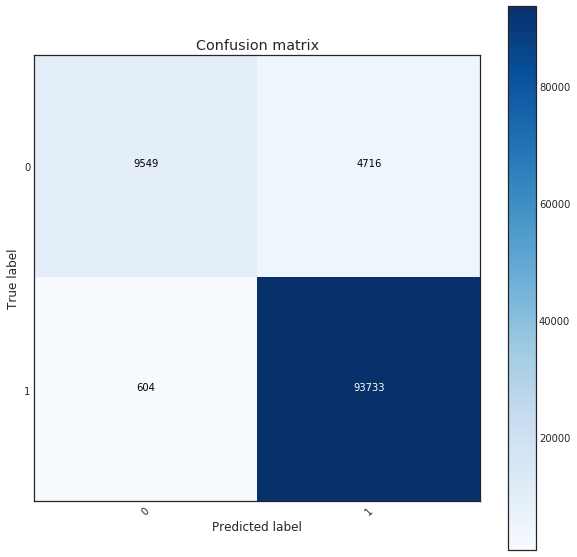

In [61]:
#Draw the confusion matrix
fig = plt.figure(figsize = (10,10))
with plt.style.context(('seaborn-white')):
    plot_confusion_matrix(confusion_matrix(y_te,pred_knn),[0,1])
plt.show()

In [62]:
#Accruacy rate
sum(pred_knn == y_te)/len(y_te)

0.95101379348446624

From the confusion matrix and accuracy rate produced by prediction of KNN classifier, over 95% cases are predicted correct, and the most frequent error is that the loan of bad status is misclassified as good status, which is nearly 8 times the opposite situation.

### Random Forest Classifier

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

Random Forest Classifier is another popular and relatively accurate classification method, which prevent overfitting by averaging a large number of decision trees. We implement the random forest classifier with the number of trees prespecified as 1000, and compute the misclassification rate of prediction on the testing set.

In [66]:
from sklearn.ensemble import RandomForestClassifier

#Fit the random forest classifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 0)
rf.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [67]:
#Print the feature importances
rf.feature_importances_

array([ 0.00321297,  0.02193768,  0.00175709,  0.02811326,  0.14455459,
        0.06636936,  0.01405233,  0.01344141,  0.0127894 ,  0.0100381 ,
        0.19262436,  0.00163503,  0.192955  ,  0.00560816,  0.02313641,
        0.05259838,  0.02912073,  0.18605574])

Feature ranking:
1. feature 12 (0.192955)
2. feature 10 (0.192624)
3. feature 17 (0.186056)
4. feature 4 (0.144555)
5. feature 5 (0.066369)
6. feature 15 (0.052598)
7. feature 16 (0.029121)
8. feature 3 (0.028113)
9. feature 14 (0.023136)
10. feature 1 (0.021938)
11. feature 6 (0.014052)
12. feature 7 (0.013441)
13. feature 8 (0.012789)
14. feature 9 (0.010038)
15. feature 13 (0.005608)
16. feature 0 (0.003213)
17. feature 2 (0.001757)
18. feature 11 (0.001635)


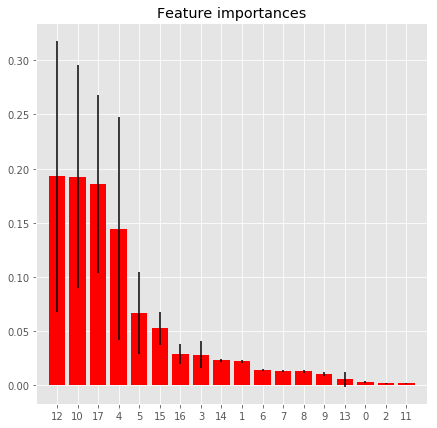

In [77]:
#Reference: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_tr.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize = (7,7))
plt.title("Feature importances")
plt.bar(range(X_tr.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_tr.shape[1]), indices)
plt.xlim([-1, X_tr.shape[1]])
plt.show()

In [83]:
#Check the labels of feature 12, 10, 17 and 4
train[train.columns.difference(['loan_status'])].columns[[12,10,17,4]]

Index(['recoveries', 'out_prncp', 'total_rec_prncp', 'last_pymnt_amnt'], dtype='object')

The feature importance plot shows that among the 18 features, actually only 4(with a feature importance over 0.1) of them make the major contribution to the classification, and they also have the largest inter-trees variability. 

By looking them up in the original dataset, we can recognize that they are **recoveries, out_prncp, total_rec_prncp** and **last_pymnt_amnt**. We can conclude here that the random forest classifier attach a great importance to the payment of loan, especially the payment situation of principal.

In [68]:
#Predict on the testing set
pred_rf = rf.predict(X_te)

In [69]:
#ROC curve
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_te, pred_rf)
roc_auc = auc(fpr, tpr)

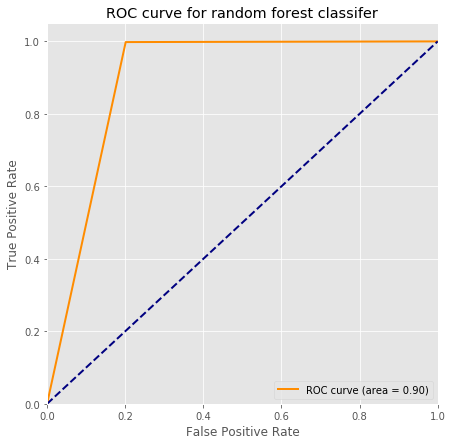

In [84]:
#Plot ROC curve
plt.figure(figsize = (7,7))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for random forest classifer')
plt.legend(loc="lower right")
plt.show()

In [72]:
#PR curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_te, pred_rf)
precision, recall, _ = precision_recall_curve(y_te, pred_rf)

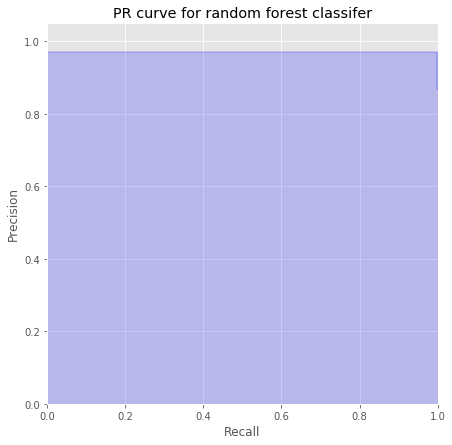

In [86]:
#Plot the Precision-Recall curve
plt.figure(figsize = (7,7))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR curve for random forest classifer'.format(average_precision))
plt.show()

The ROC curve and PR curve are both very satisfiable.the ROC curve is very close to the upper left corner, and the PR curver is really close to 1, implying that the prediction is quite accurate.

Confusion matrix, without normalization
[[11394  2871]
 [  176 94161]]


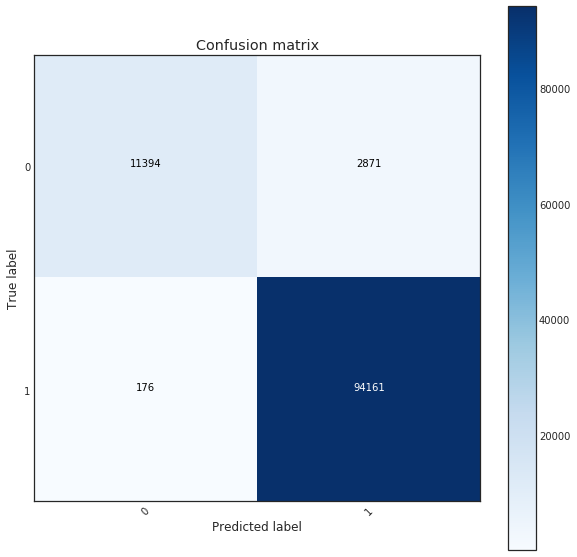

In [74]:
#Draw the confusion matrix
fig = plt.figure(figsize = (10,10))
with plt.style.context(('seaborn-white')):
    plot_confusion_matrix(confusion_matrix(y_te,pred_rf),[0,1])
plt.show()

In [75]:
#Accruacy rate
sum(pred_rf == y_te)/len(y_te)

0.97194342645623466

The random forest classifier also have a very high accuracy rate of over 97%, and the most frequent error is the loan of bad status is misclassified as good status as well, which is, more extremely, over 16 times the opposite situation.